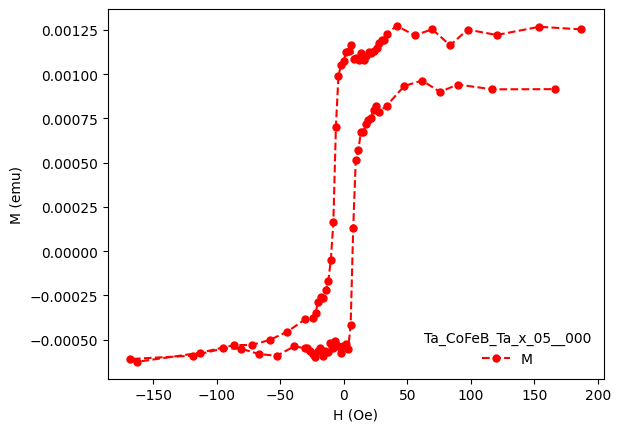

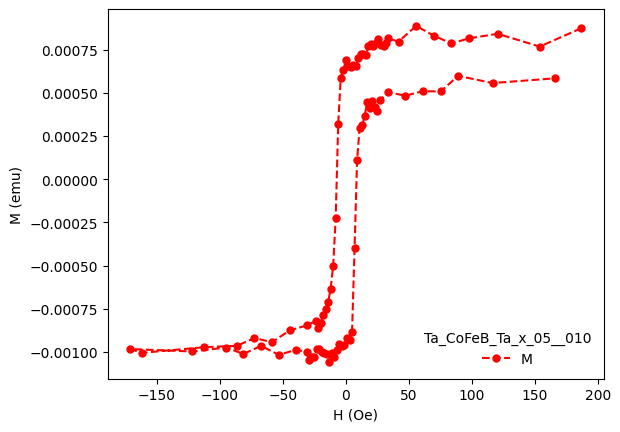

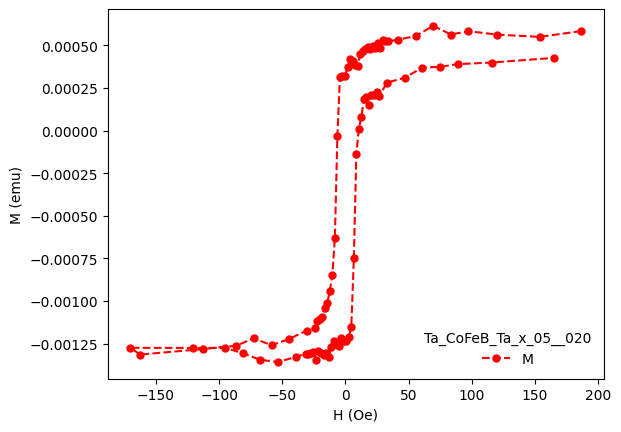

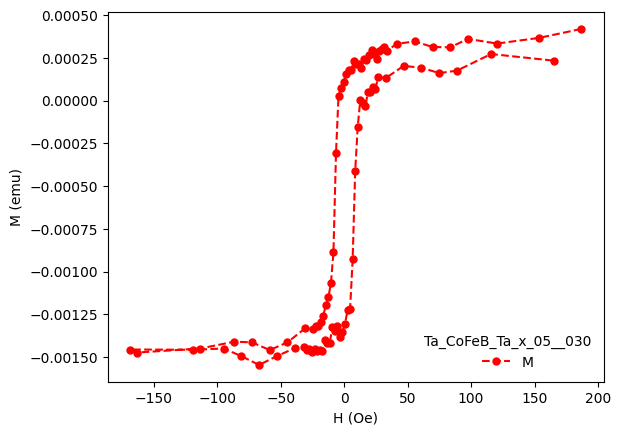

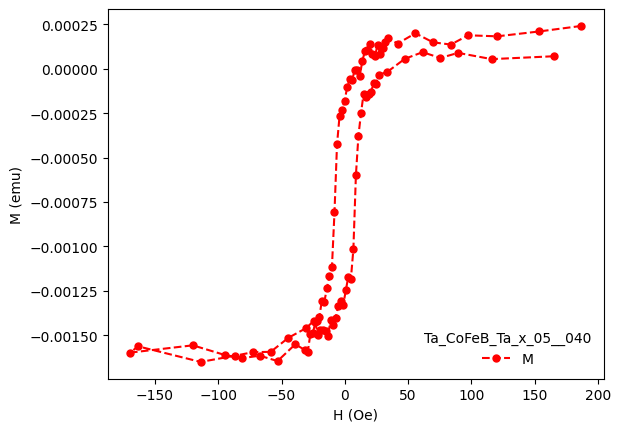

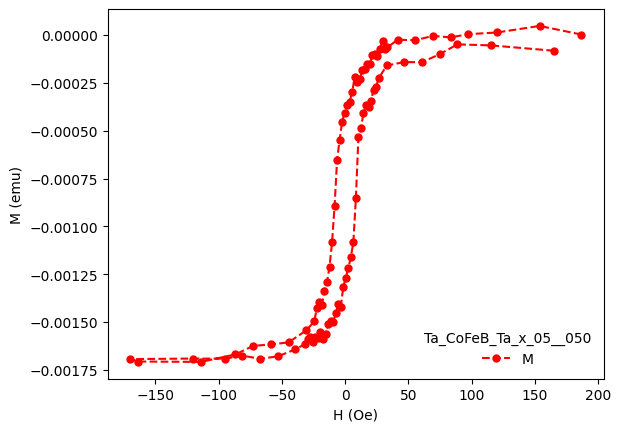

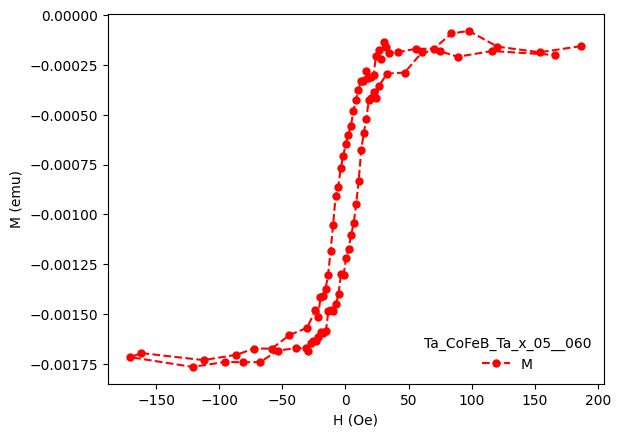

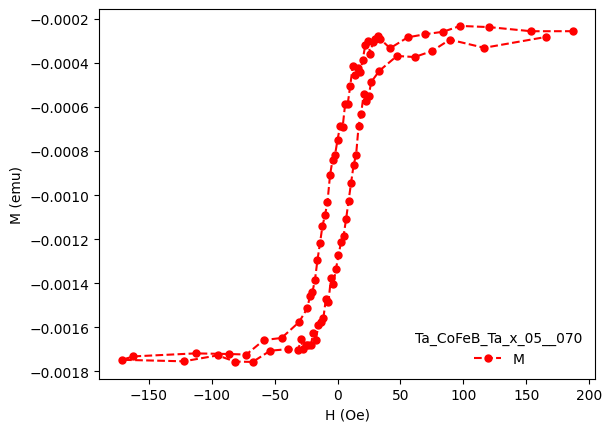

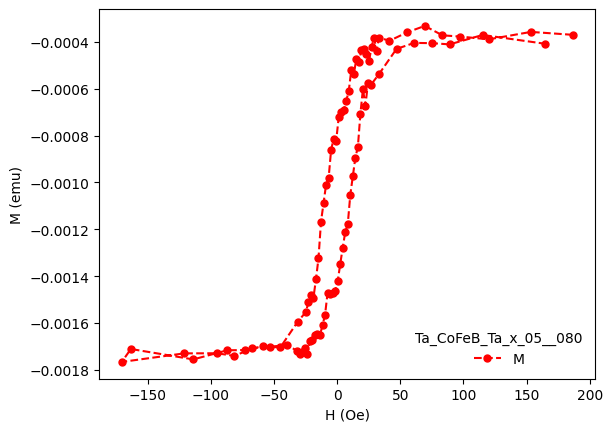

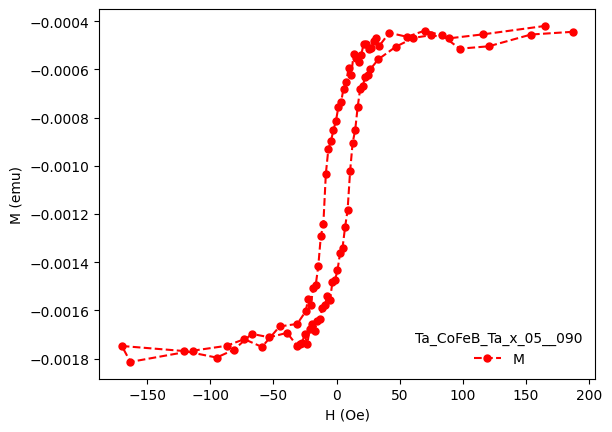

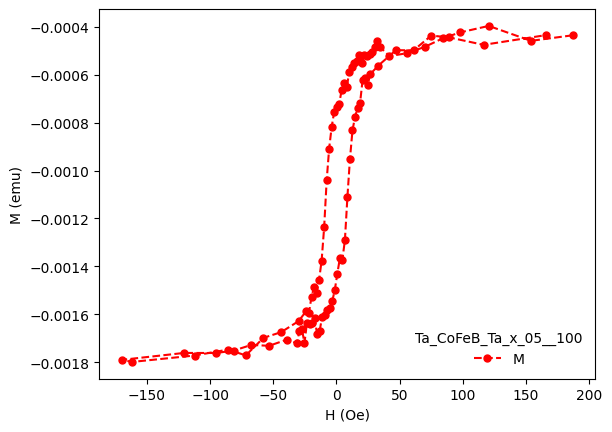

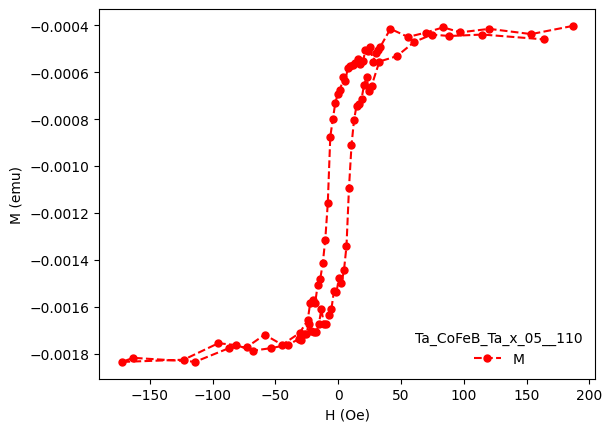

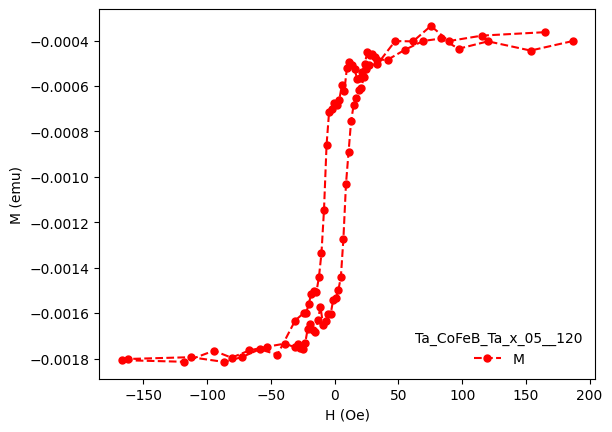

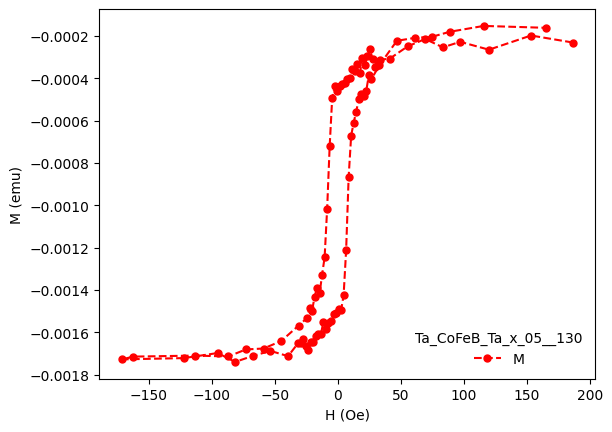

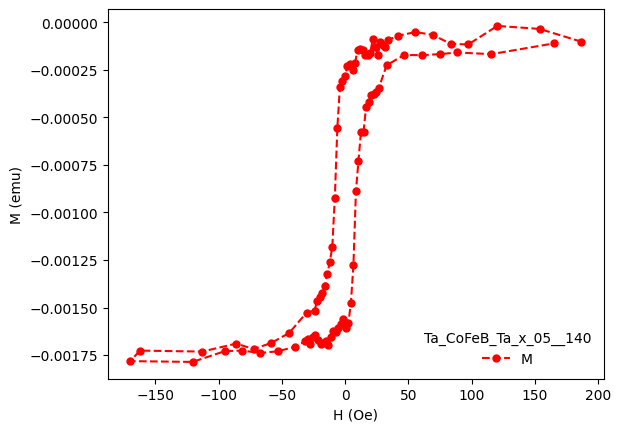

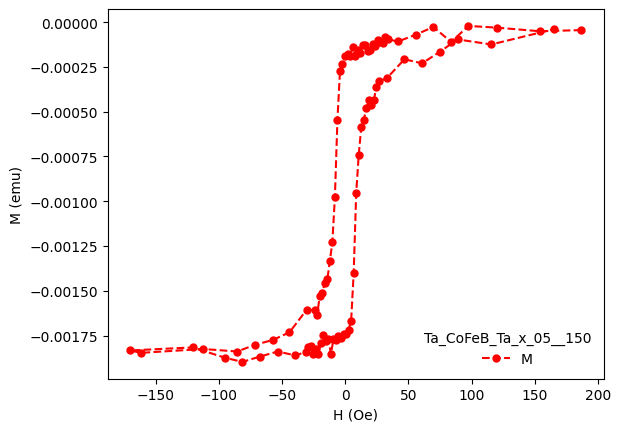

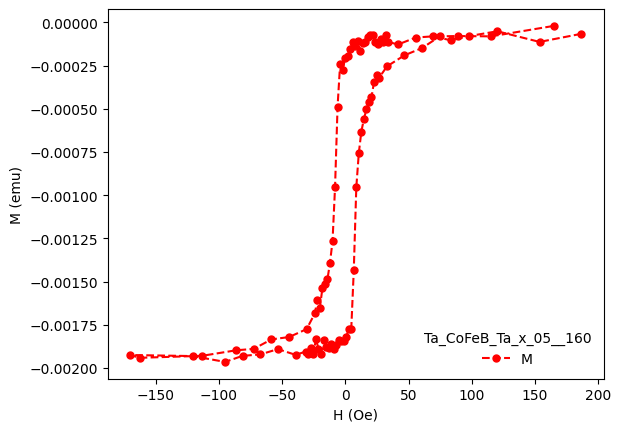

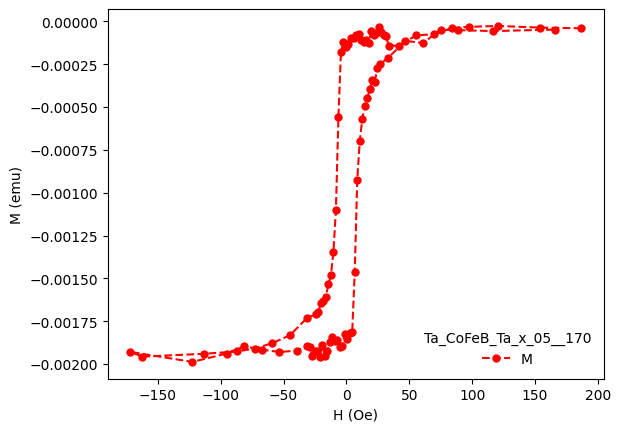

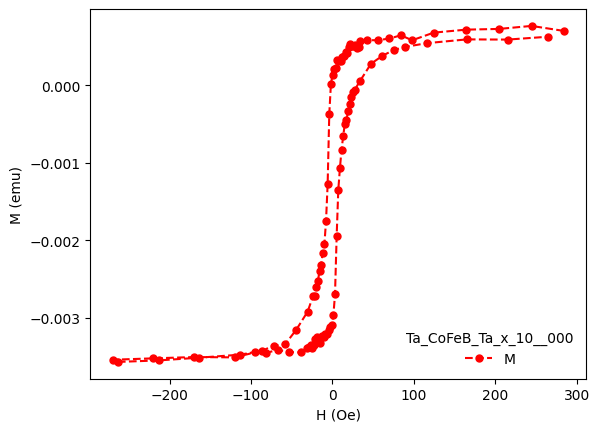

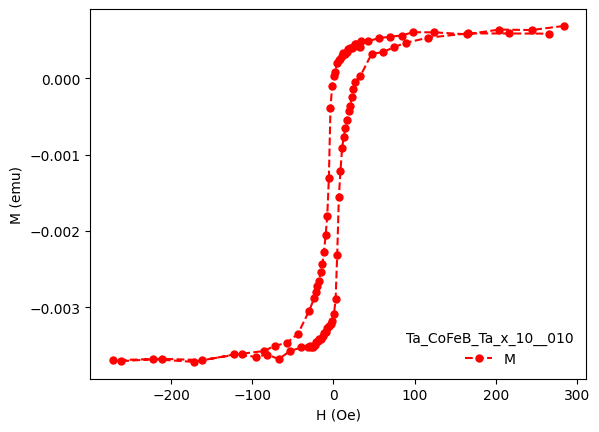

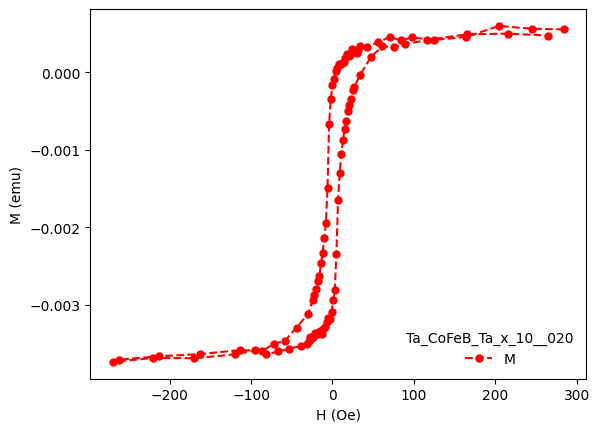

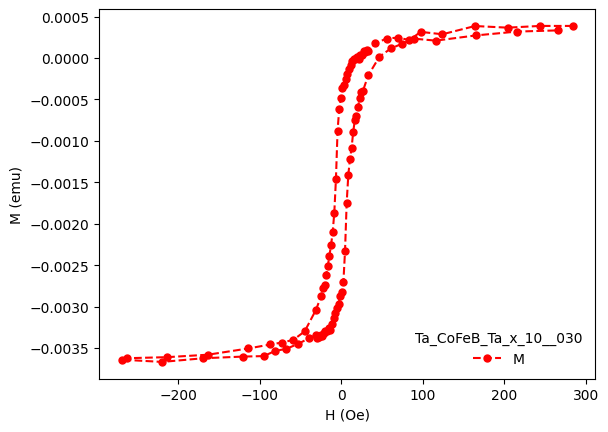

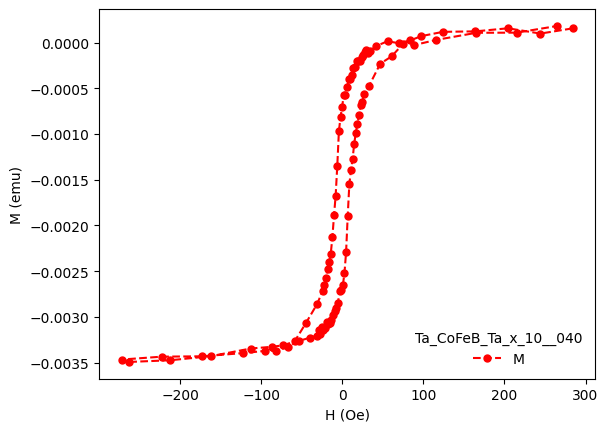

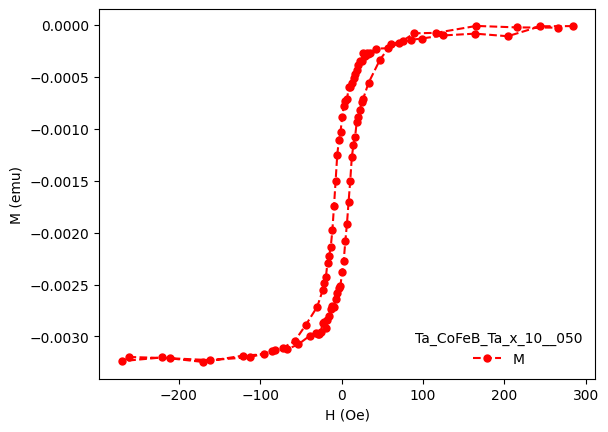

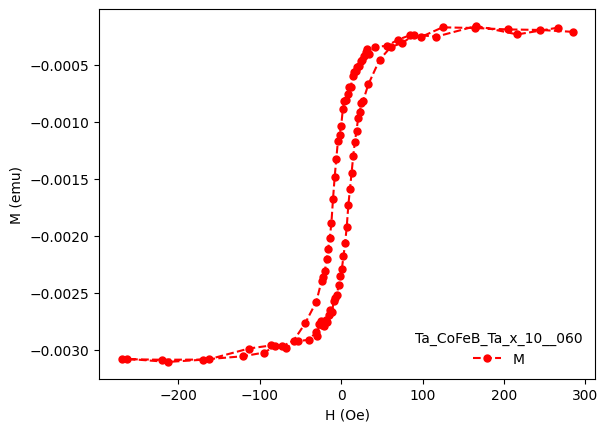

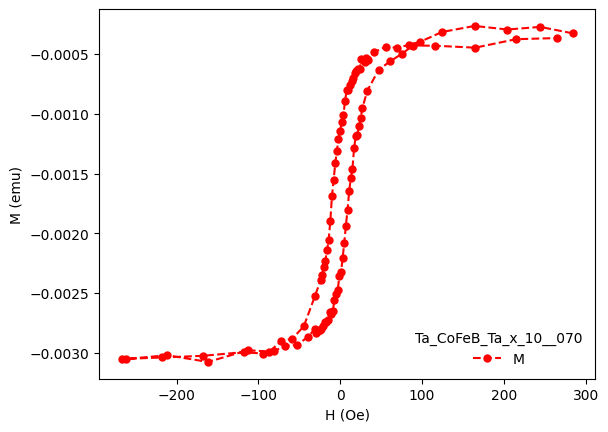

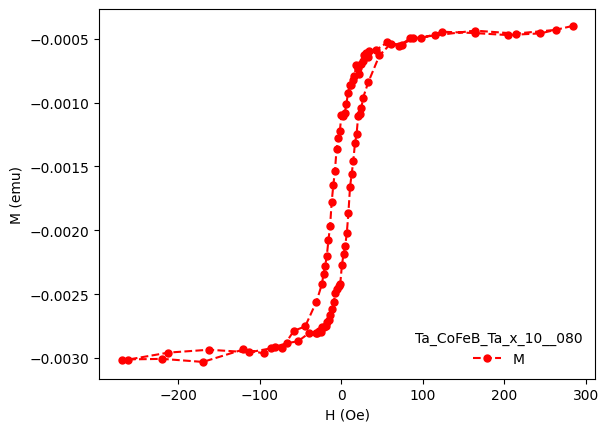

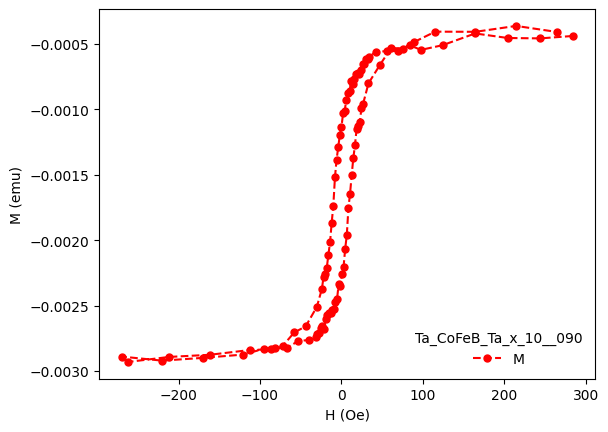

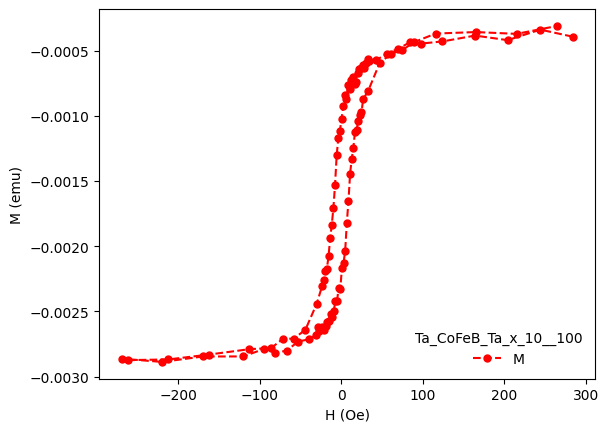

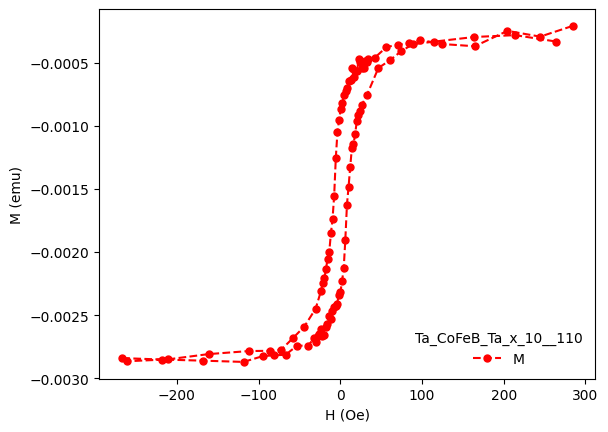

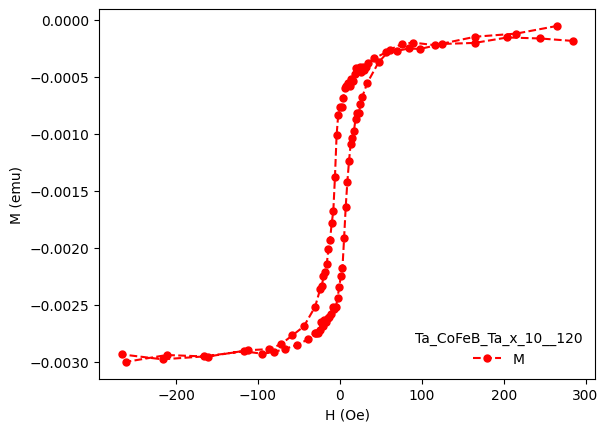

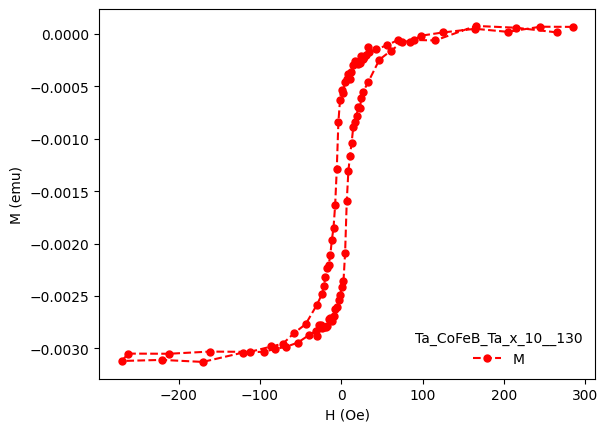

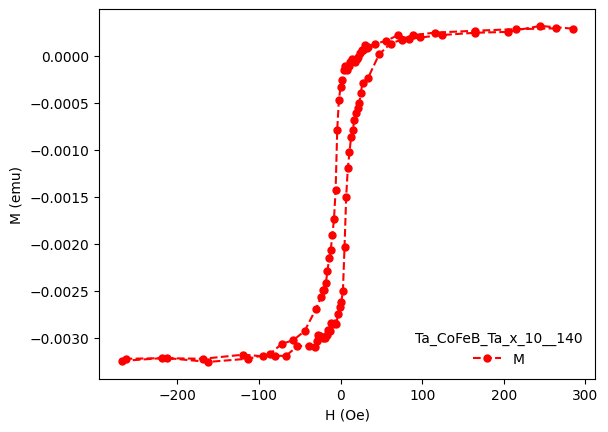

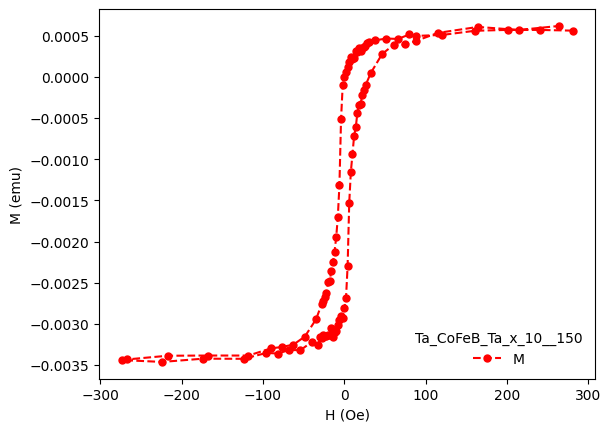

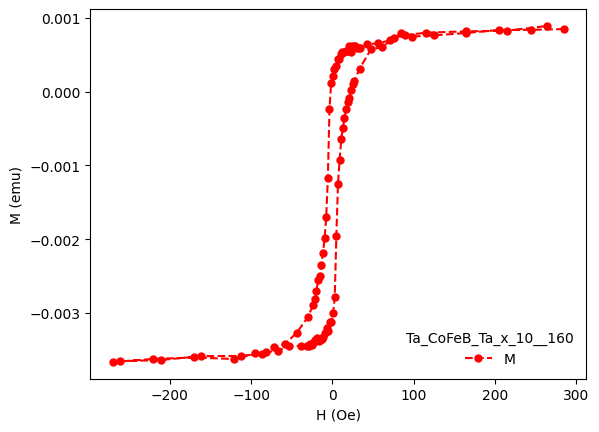

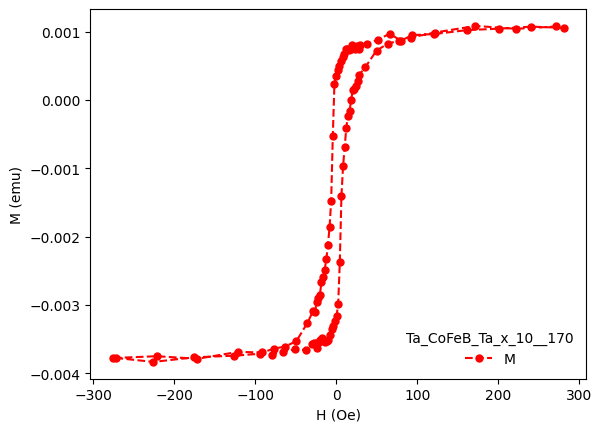

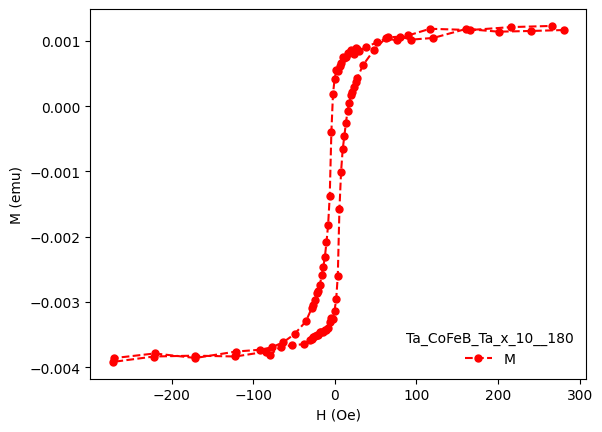

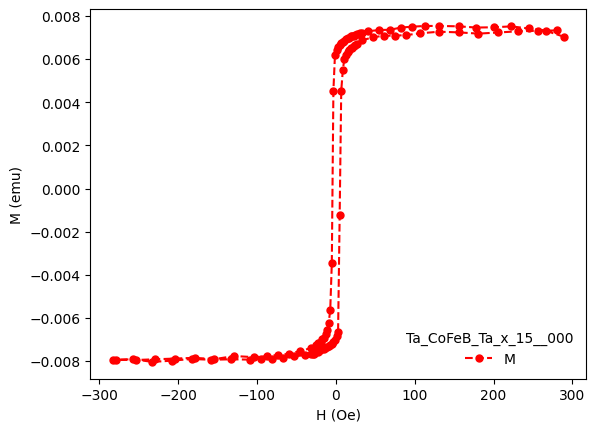

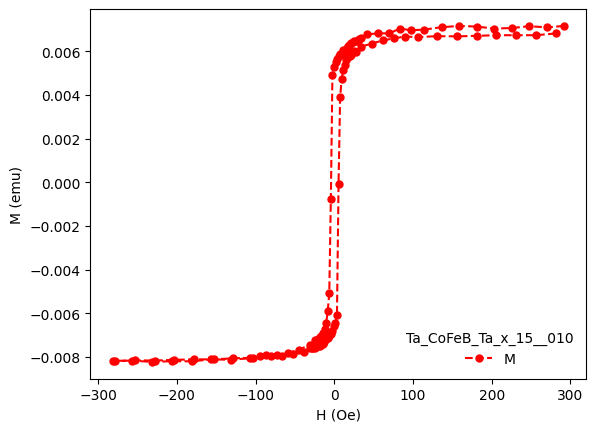

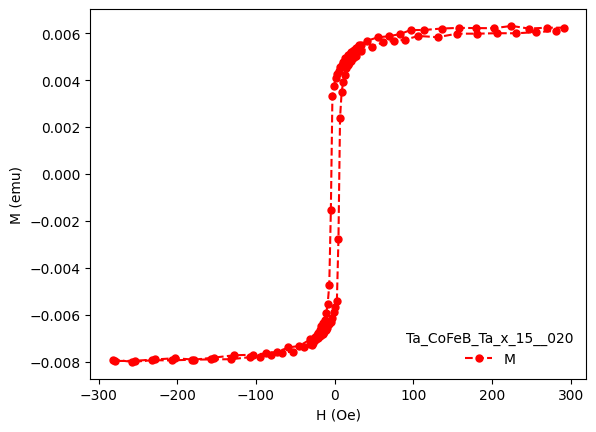

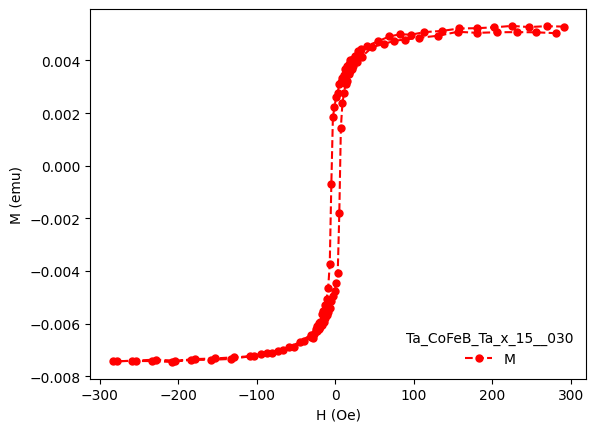

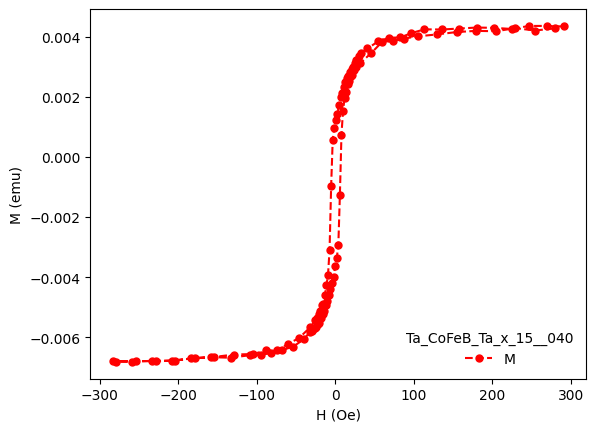

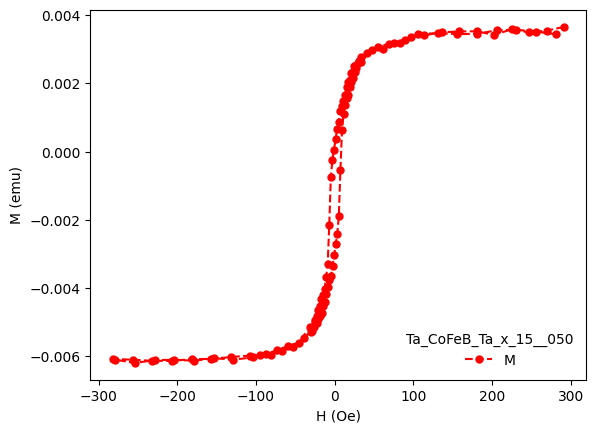

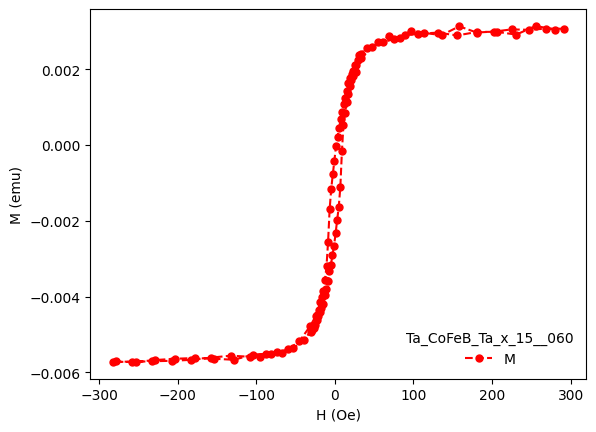

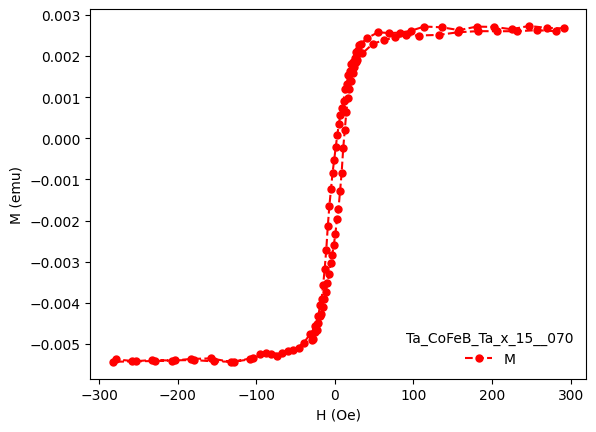

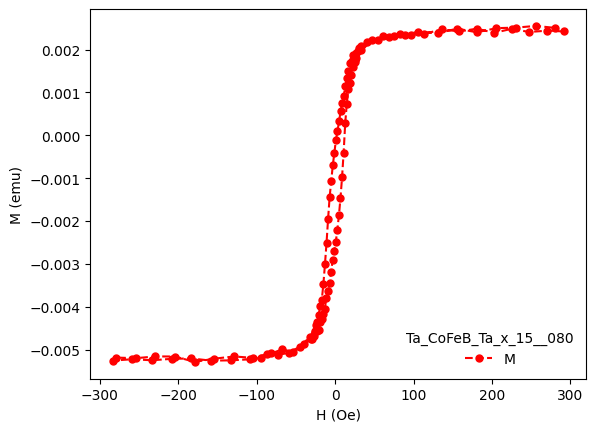

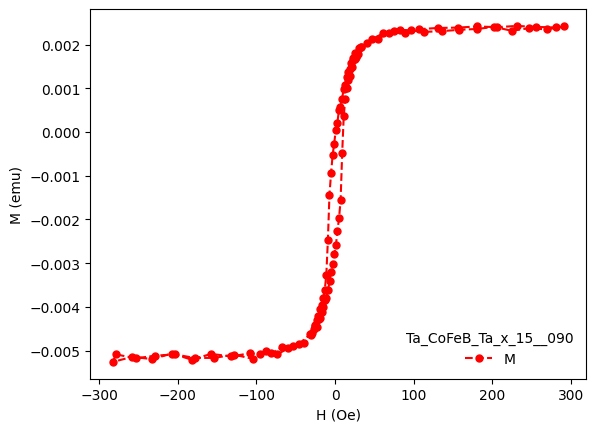

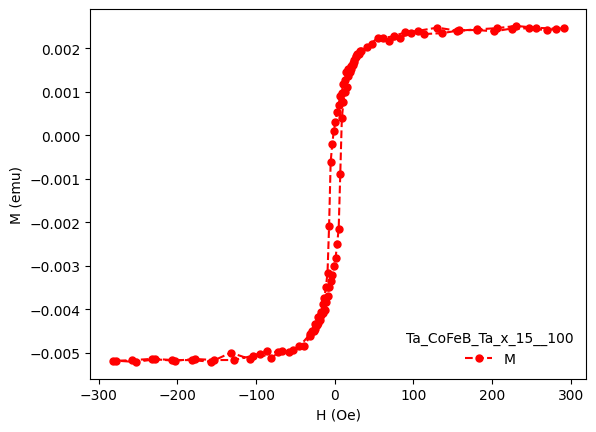

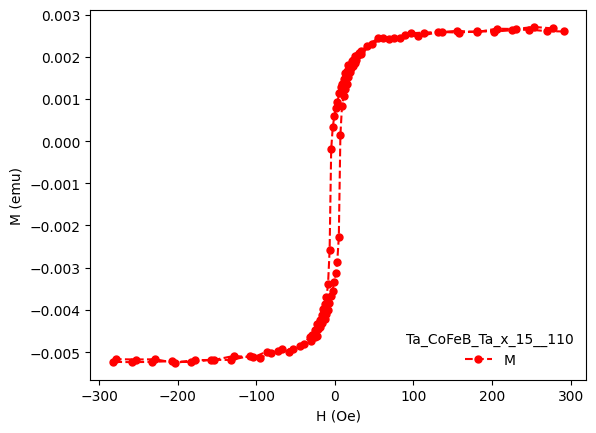

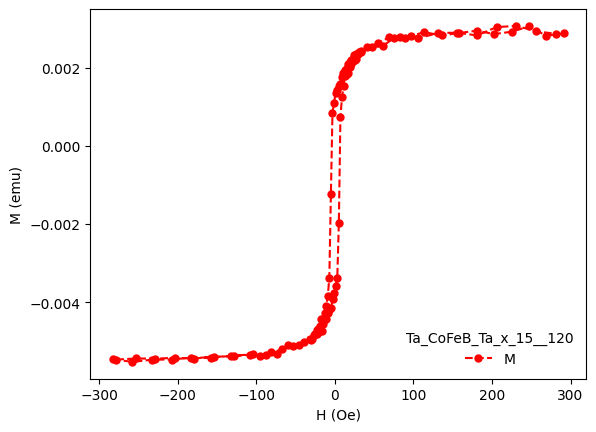

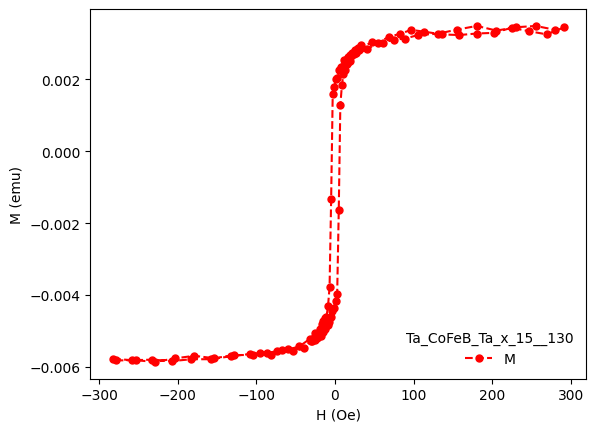

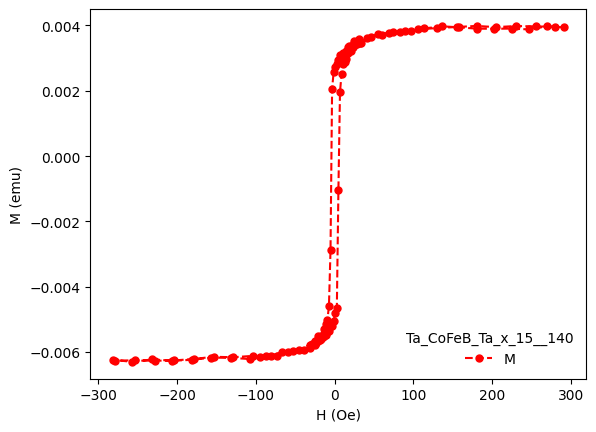

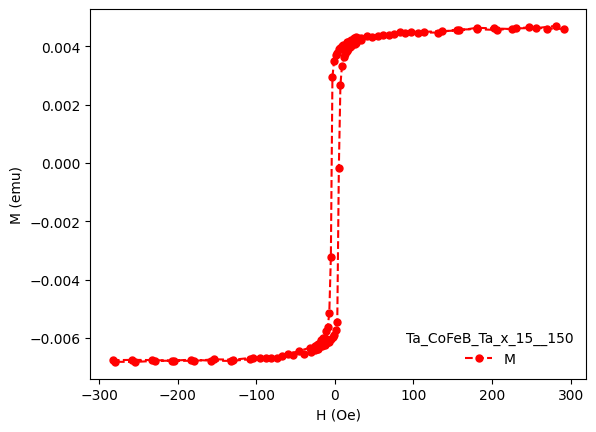

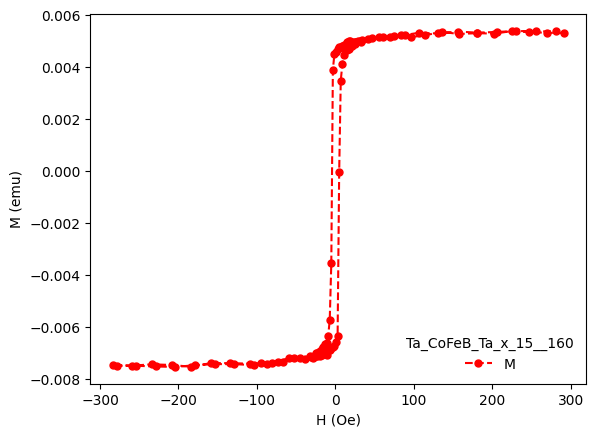

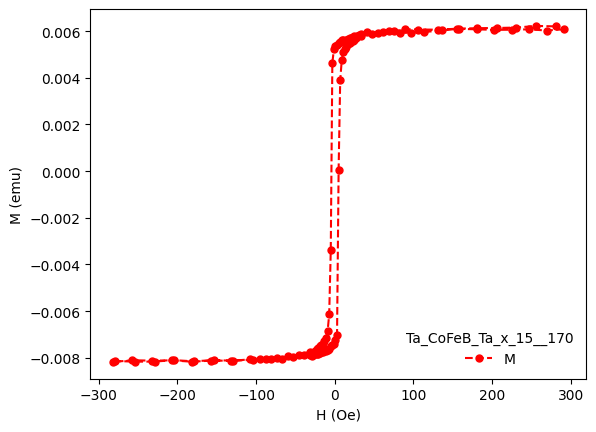

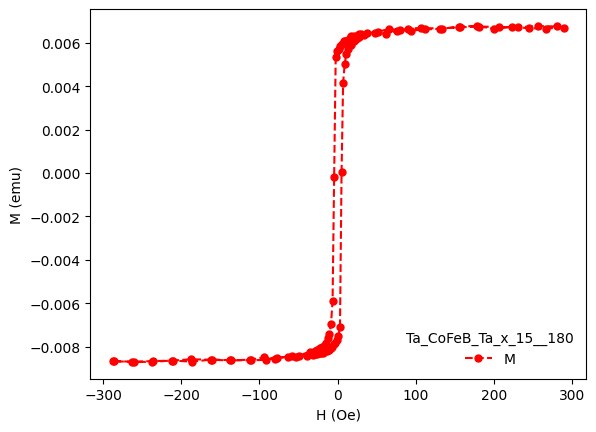

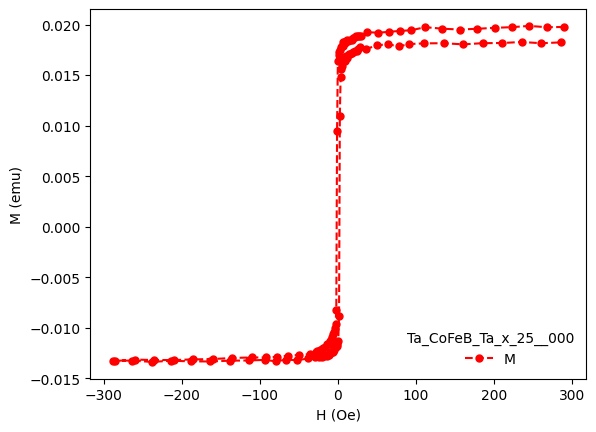

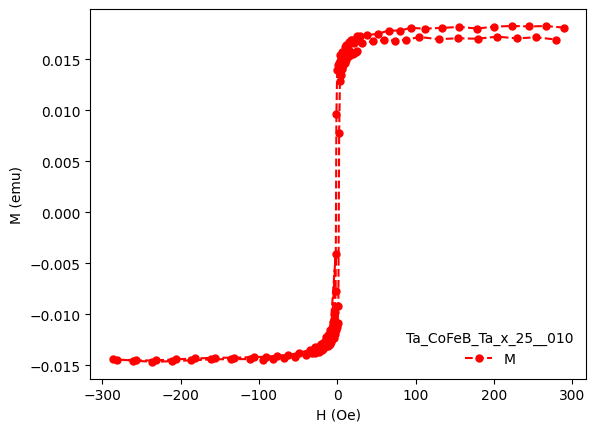

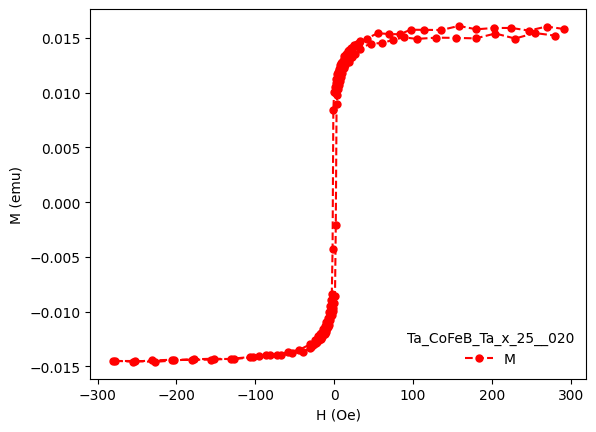

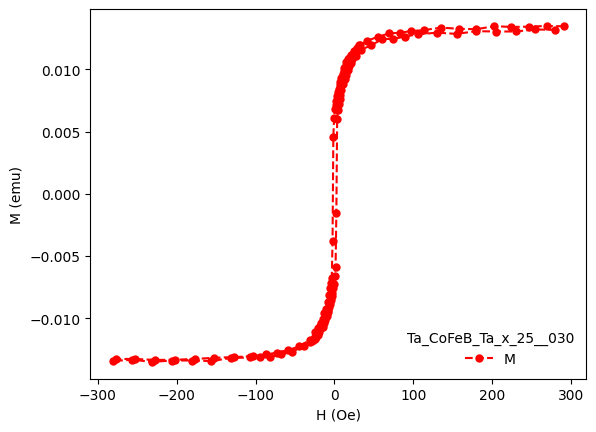

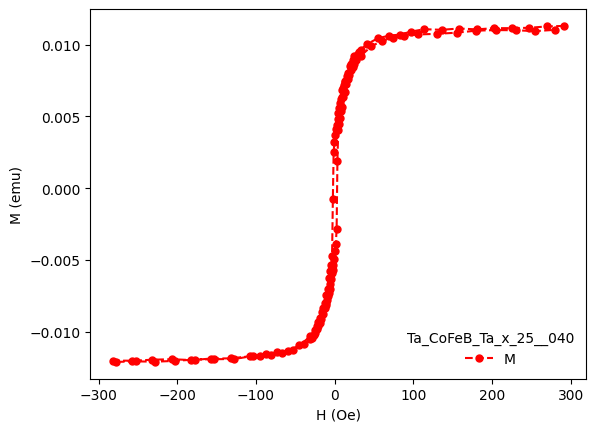

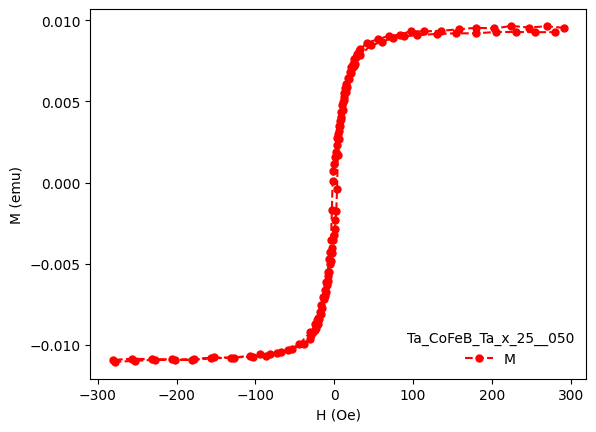

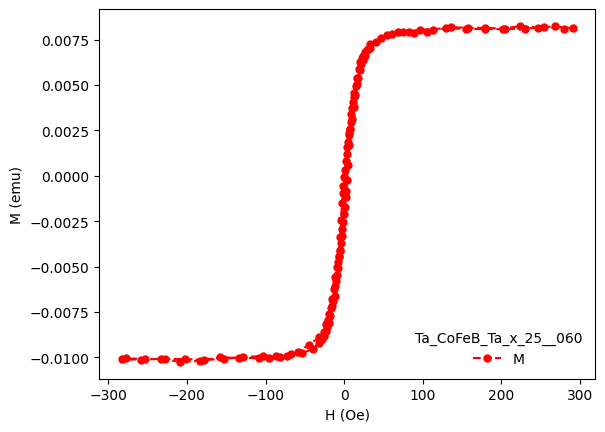

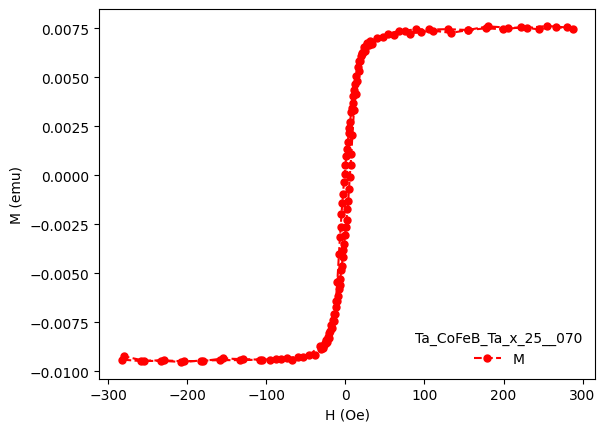

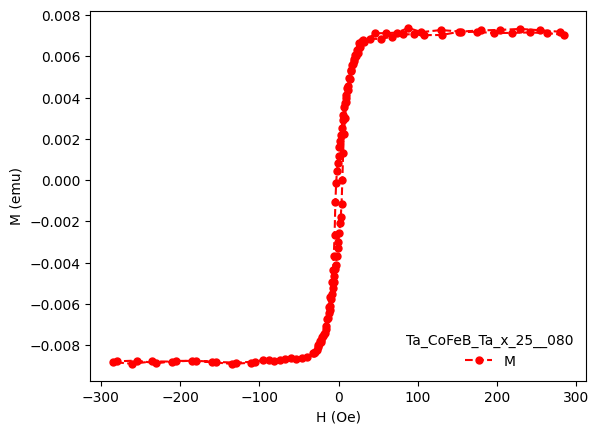

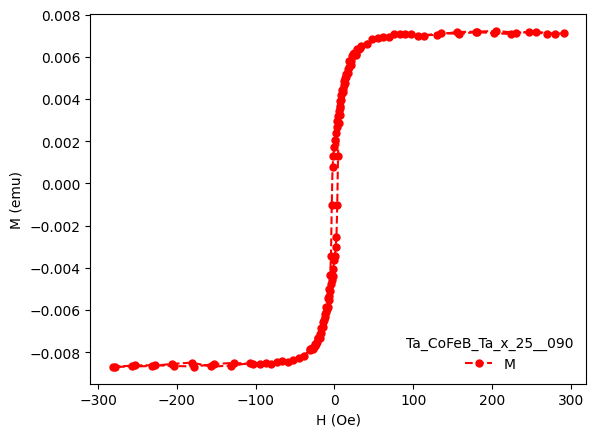

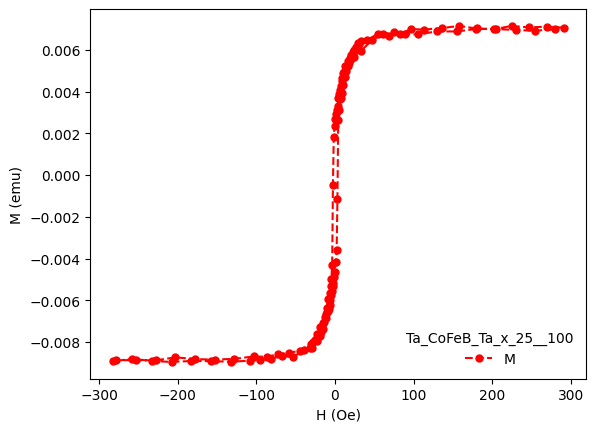

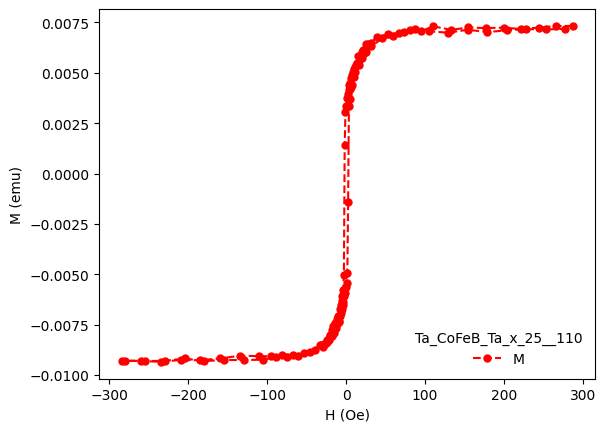

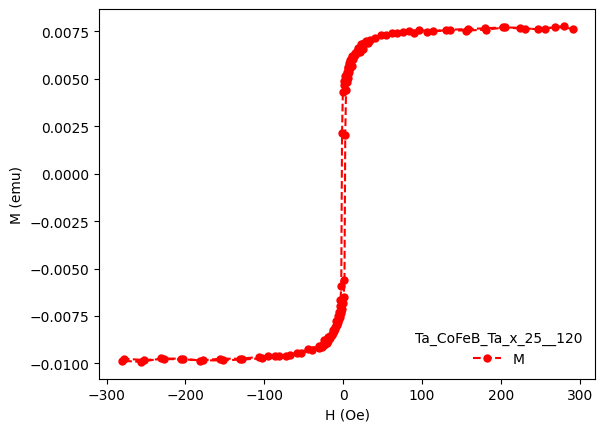

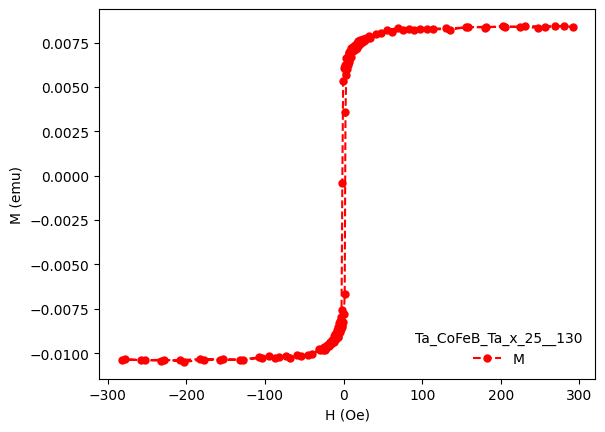

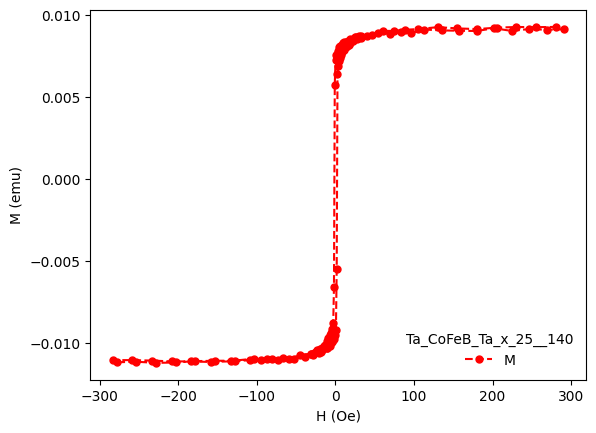

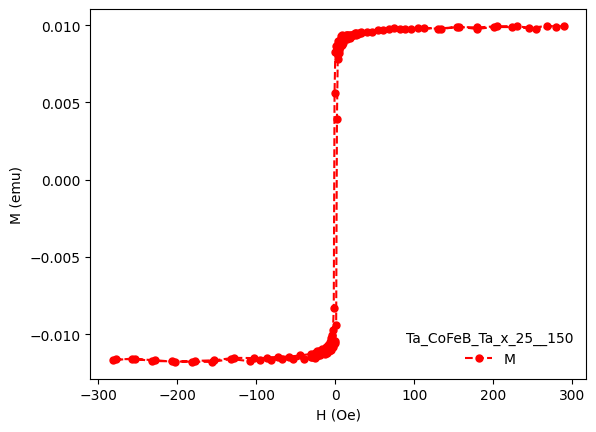

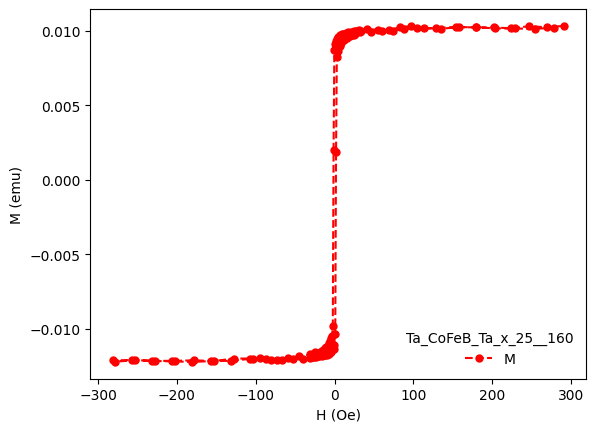

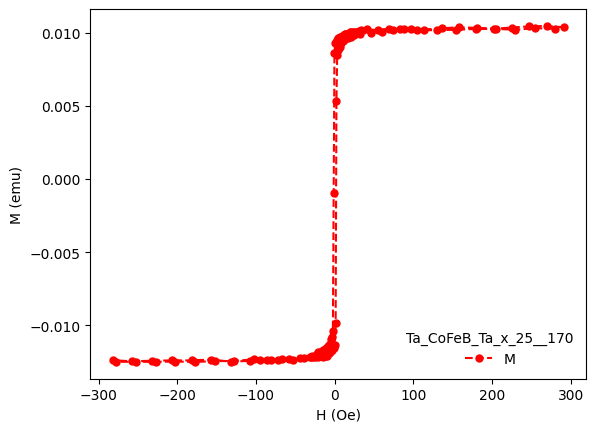

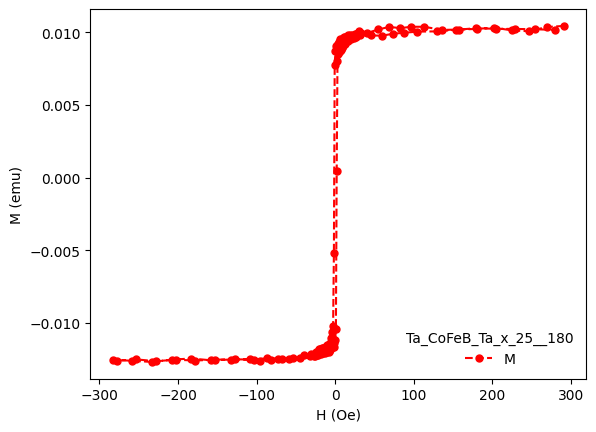

In [1]:
#import matplotlib, os, and filepathing for respectives graphical functionality, directories management and file pathing for current device
import matplotlib.pyplot as plt #type:ignore
import os
from filePathing import pathToDataDirForThisDevice, pathToGraphsForThisDevice

#file pathing
pathToData = pathToDataDirForThisDevice
pathToGraphs = pathToGraphsForThisDevice
getListOfFiles = [os.path.join(pathToData, singleDataFile) for singleDataFile in os.listdir(pathToData) if os.path.isfile(os.path.join(pathToData, singleDataFile))]

#loop for plotting all graphs
#notice that before the colon, ':',  in this first line we can put brackets, '[]', and specify a range to be plotted instead of plotting everything. example: '[18:37]:'; this will plot the files 18 and 36 and every single one in between these two
for counter in range(len(getListOfFiles)):

  #dataset opening and reading
  with open(getListOfFiles[counter], "r") as file:
    baseFileName = os.path.splitext(os.path.basename(getListOfFiles[counter]))[0]
    readSampleName = baseFileName[:-3] 
    angle = baseFileName[-3:] 

    lineReadingsForDataset = file.readlines()[12:]
    arrayForDataset = []
    for line in lineReadingsForDataset:
      singleLineForDataset = line.split() 
      associateFileLineWithArrayRowForDataset = [float(reading) for reading in singleLineForDataset]
      arrayForDataset.append(associateFileLineWithArrayRowForDataset)

  #this buildds the axes in the graph from using the array
  xAxisReadingsForDataset = [row[0] for row in arrayForDataset if row]
  yAxisReadingsForDataset = [row[1] for row in arrayForDataset if row]

  #plot graph for dataset
  plt.plot(xAxisReadingsForDataset, yAxisReadingsForDataset, "--o", color="r", markersize=5)
  plt.xlabel("H (Oe)")
  plt.ylabel("M (emu)")
  plt.legend(["M"], loc = "lower right", title=f"{readSampleName}_{angle}", frameon=False)
  plt.savefig(os.path.join(pathToGraphs, f"graph_{readSampleName}_{angle}.png"))
  plt.show()